# sim_study_rippler_no_seasonality

## preamble

In [2]:
# importing numpy
import numpy as np
from numpy import random

In [3]:
# importing plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [4]:
# importing storage for results
import zarr

In [5]:
# importing pandas
import pandas as pd

## simulated data

In [6]:
# loading in functions for simulation
%run '../../function_scripts/model/UC_simulation.py'

In [7]:
# importing the csv - only the important columns
data_real = pd.read_csv("../../Antidote_household.csv", usecols=["hid","pid","date","age","sex","hiv","hivChild","cpt","result","week"])

# converting the pid to integers (and saving lists of sex and age)
pid_unique = []
no_individuals = 0
test_individuals = []
sex = []
age = []
for i in range(1659):
    pid = data_real['pid'][i]
    if pid in pid_unique:
        test_individuals.append(pid_unique.index(pid))
    else:
        pid_unique.append(pid)
        test_individuals.append(no_individuals)
        sex.append(data_real['sex'][i])
        age.append(data_real['age'][i])
        no_individuals += 1
sex = np.array(sex)
age = np.array(age)

# centring age and sex
age = age - np.mean(age)
sex = sex - np.mean(sex)

# calculating N and T
N = no_individuals
T = int(max(data_real['week']))

# making a test result matrix (for the real test results)
test_results_real = np.tile(np.nan,(T+1,N))
for i in range(1659):
    j = test_individuals[i]
    t = int(data_real['week'][i])
    test_results_real[t,j] = data_real['result'][i]

# converting the hid to integers
hid_unique = []
no_houses = 0
test_houses = []
for hid in data_real['hid'] :
    if hid in hid_unique:
        test_houses.append(hid_unique.index(hid))
    else:
        hid_unique.append(hid)
        test_houses.append(no_houses)
        no_houses += 1

# list of which house each individual is in
house_list = []
for i in range(N):
    test_no = test_individuals.index(i)
    house_list.append(test_houses[test_no])

# making a household mixing matrix
h = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if house_list[i]==house_list[j]:
            h[i,j] = 1

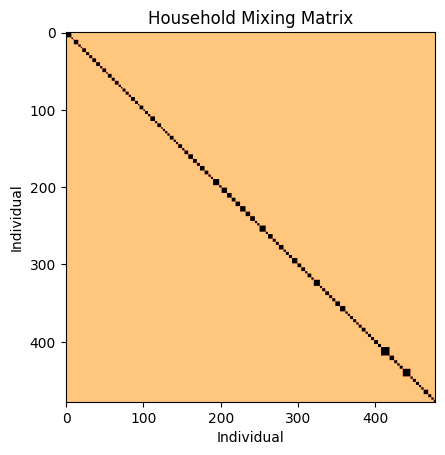

In [8]:
# plotting h
plt.imshow(h,cmap="copper_r")
plt.title("Household Mixing Matrix")
plt.ylabel("Individual")
plt.xlabel("Individual")
plt.show()

In [9]:
# true values of the paramters
theta = np.array([0.1,1.5,0,0])

In [10]:
# true values of other inputs
prop_0 = 0.3
gamma = 0.5
test_rate = 0.3 #will be replaced with other test data, but parameter needed for simulation
sens = 0.95
spec = 0.999

In [11]:
# seasonality modifiers
seasonality_mode = 0
seasonal_period = 1
t_ast = 0

# resulting matrices
seasonal_vector = np.array([1 - np.cos(2*np.pi*(t+t_ast)/seasonal_period) for t in range(T+1)])
seasonal_matrix_G = np.tile(1, (T+1,N))
seasonal_matrix_H = np.tile(1, (T+1,N))

In [12]:
# simulating the data
UC_results = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

In [13]:
# creating a test result matrix
random.seed(256)
test_occurance = test_results_real*0 + 1
pos_prob = 0.9*UC_results['X'] + (1-0.99)*(1-UC_results['X'])
test_outcome = random.binomial(1,pos_prob)
test_results = test_outcome * test_occurance

/tmp/ipykernel_37507/1869204714.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_37507/1869204714.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


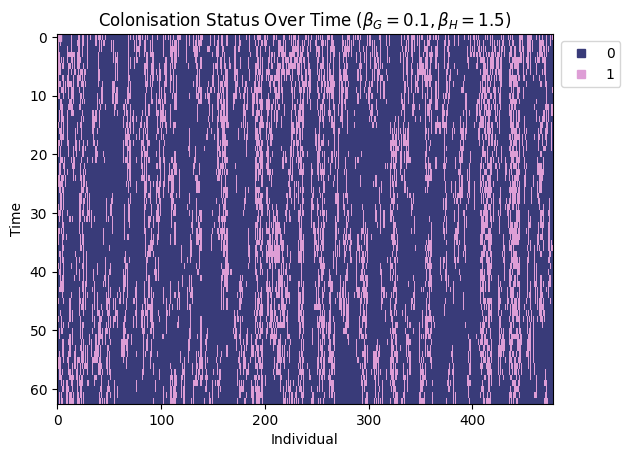

In [14]:
# plotting X
plt.imshow(UC_results['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=0.1, \beta_H=1.5$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

In [15]:
# simulating other datasets
UC_results2 = UC_sim(N,h,age,sex,prop_0,np.array([0.1,3,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results3 = UC_sim(N,h,age,sex,prop_0,np.array([1.5,0.1,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

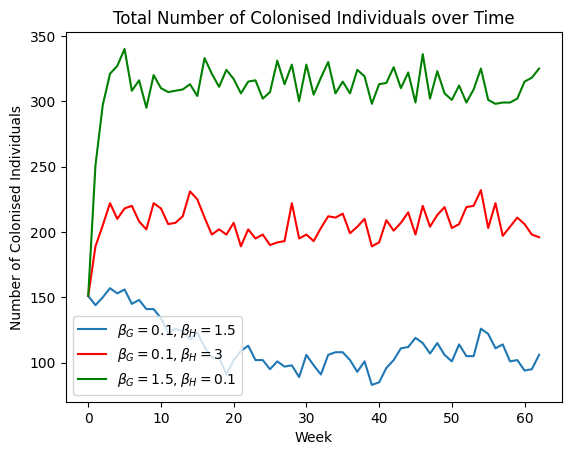

In [16]:
# plotting the number of colonised individuals over time
plt.plot(UC_results['sum_C'],label=r'$\beta_G=0.1, \beta_H=1.5$')
plt.plot(UC_results2['sum_C'],label=r'$\beta_G=0.1, \beta_H=3$',color="red")
plt.plot(UC_results3['sum_C'],label=r'$\beta_G=1.5, \beta_H=0.1$',color="green")
plt.legend()
plt.title("Total Number of Colonised Individuals over Time")
plt.ylabel("Number of Colonised Individuals")
plt.xlabel("Week")
plt.show()

/tmp/ipykernel_37507/3765168887.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_37507/3765168887.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


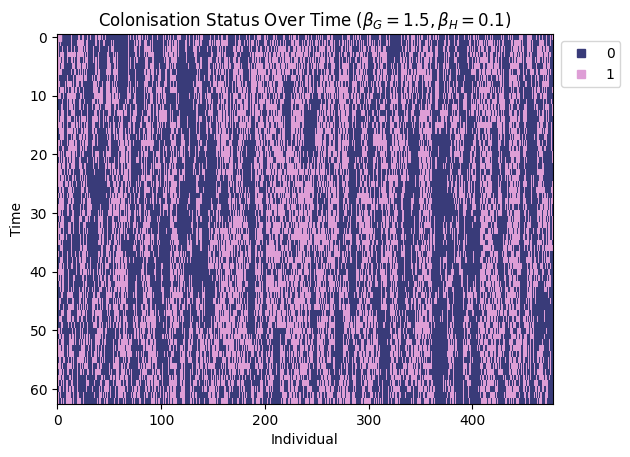

In [17]:
# plotting X
plt.imshow(UC_results2['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=1.5, \beta_H=0.1$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

/tmp/ipykernel_37507/2616147949.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_37507/2616147949.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_37507/2616147949.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


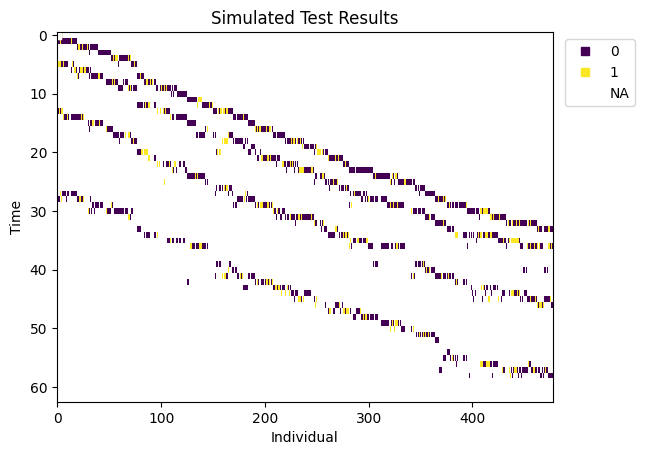

In [18]:
# looking at the test result matrix
plt.imshow(test_results,cmap="viridis",interpolation="nearest",aspect="auto")
colour0 = '#440154'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#fae622'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1.0), scatterpoints=1)
plt.title(r'Simulated Test Results')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

In [19]:
# function to work out the number of TP/FP/TN/FNs
def test_acc(X:np.array,test_results:np.array) :
    
    # list of inputs:
    # X - matrix of all individuals colonisation status over time
    # test_results - matrix of all individuals colonisation status over time

    # creating a matrix comparing the results with the current latent variable values (0 for TPs or TNs, 1 for FPs, -1 for FNs, and nan for no tests)
    test_diff_matrix = test_results - X

    # calculating the number of TP/FP/TN/FNs from this matrix
    TP = np.sum((test_diff_matrix==0)*X)
    FN = np.sum(test_diff_matrix==-1)
    FP = np.sum(test_diff_matrix==1)
    TN = np.sum((test_diff_matrix==0)*(1-X))

    # returning outputs
    output = {'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN}
    return output

In [20]:
# the number of TP/FP/TN/FNs
test_acc(UC_results['X'],test_results)

{'TP': 335, 'FN': 42, 'FP': 15, 'TN': 1181}

## inference information

In [21]:
# hyperparameters of priors
mu = np.array([0.001,0.001,0.001,0.001])
prior_X_0 = 0.3

In [22]:
# starting values
theta_start = np.array([0.5,0.5,0,0])
X_start = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)['X']
covariance_start = 0.8*0.000001*np.identity(4)
scaling = 0.8

In [23]:
# MCMC iterations
K = 10000
K_latent = 100

## acceptance rates

In [24]:
# importing the saved acceptance rates
MCMC_noncentred_acc = zarr.open('./MCMC_output/acc.zarr', mode='r')

# printing the acceptance rates
print("acc_theta:", MCMC_noncentred_acc[0])
print("acc_initial:", MCMC_noncentred_acc[1])
print("acc_latent:", MCMC_noncentred_acc[2])

# removing the acceptance rates from memory
del(MCMC_noncentred_acc)

acc_theta: 0.3088
acc_initial: 0.3631
acc_latent: 0.579275


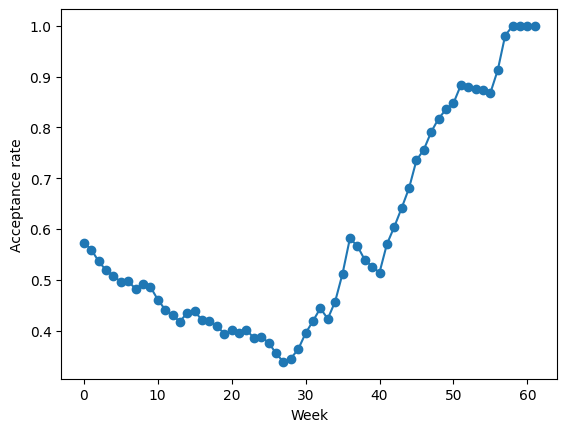

In [26]:
# importing the saved acceptance rates
MCMC_noncentred_acc_latent_times = zarr.open('./MCMC_output/acc_latent_times.zarr', mode='r')

# plotting the acceptance rate at each point in time
plt.plot(MCMC_noncentred_acc_latent_times[:])
plt.scatter(range(T),MCMC_noncentred_acc_latent_times[:])
lobf = np.polyfit(range(T),MCMC_noncentred_acc_latent_times[:],1)
#plt.title("latent varible acceptance rate by time")
plt.xlabel("Week")
plt.ylabel("Acceptance rate")
#plt.yscale("log")
#plt.savefig("plots/acceptance.pdf")
plt.show()

# removing the acceptance rates from memory
del(MCMC_noncentred_acc_latent_times)

## parameters

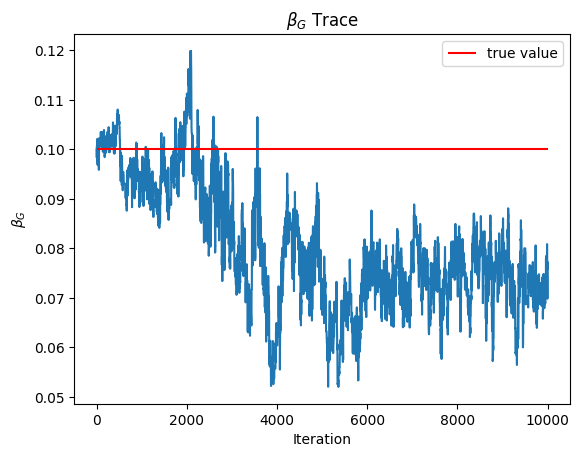

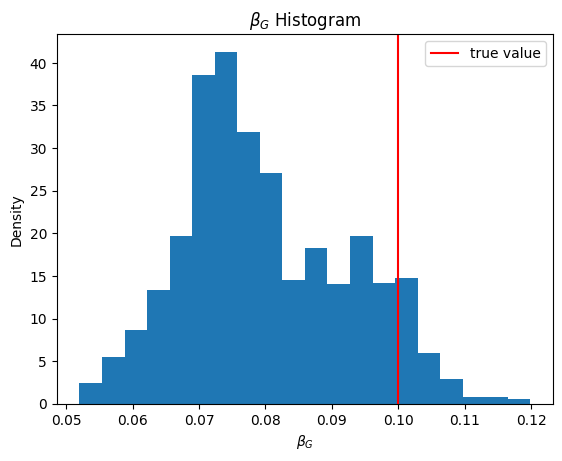

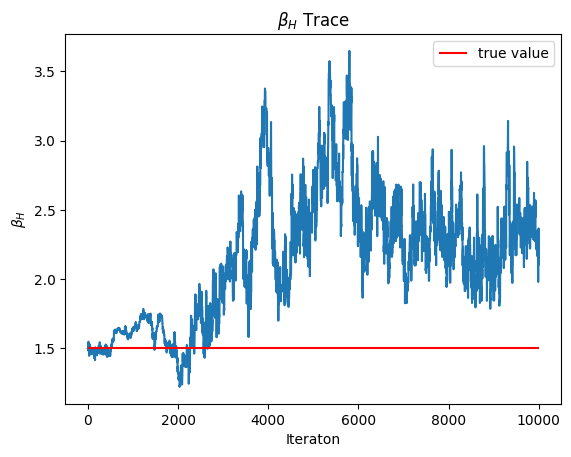

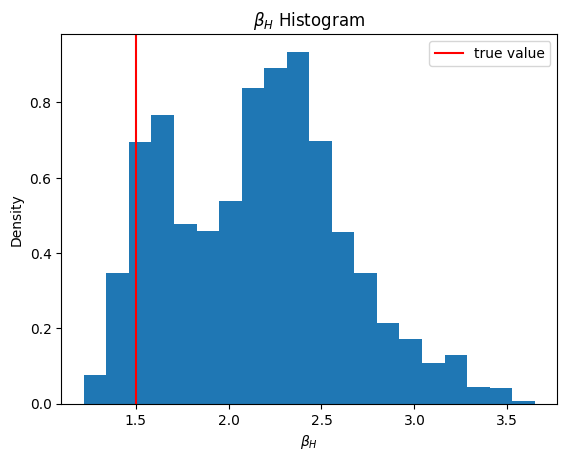

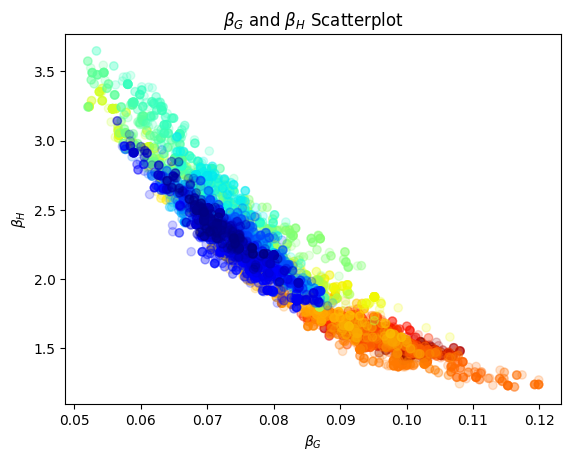

In [37]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.plot(MCMC_noncentred_theta[:K,0])
plt.hlines(np.array(theta[0]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_G$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\beta_G$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,0],density=1,bins=20)
plt.axvline(theta[0],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_G$ Histogram')
plt.xlabel(r'$\beta_G$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of beta_H
plt.plot(MCMC_noncentred_theta[:K,1])
plt.hlines(np.array(theta[1]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$ Trace')
plt.xlabel("Iteraton")
plt.ylabel(r'$\beta_{H}$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,1],density=1,bins=20)
plt.axvline(theta[1],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$ Histogram')
plt.xlabel(r'$\beta_{H}$')
plt.ylabel("Density")
plt.show()

# correlation plot of beta_G vs beta_H
plt.scatter(MCMC_noncentred_theta[:K,0],MCMC_noncentred_theta[:K,1],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \beta_{H}$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\beta_{H}$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

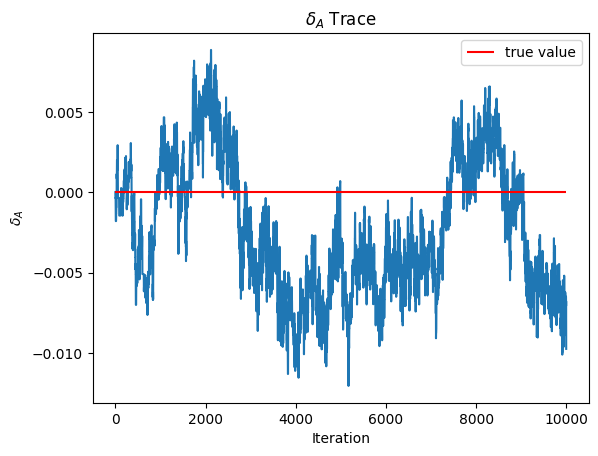

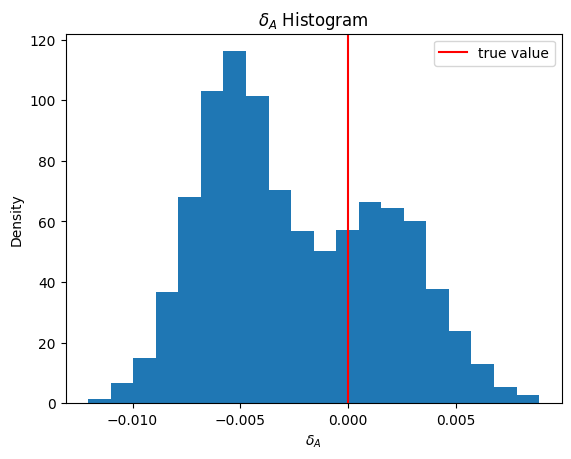

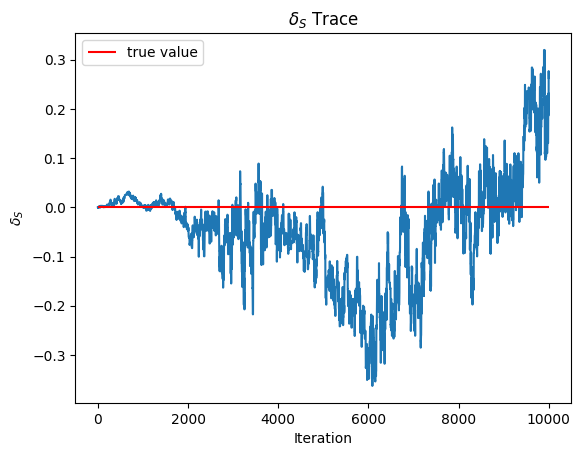

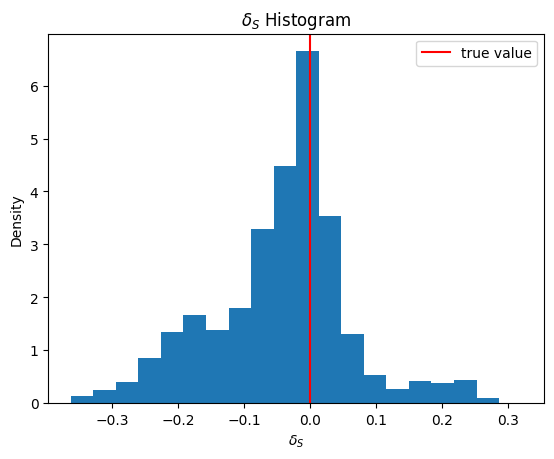

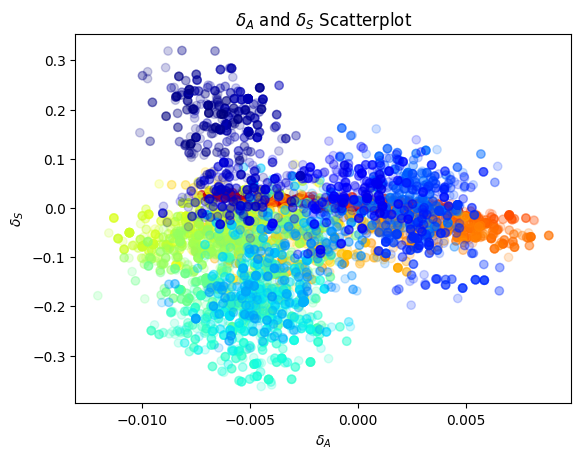

In [38]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.plot(MCMC_noncentred_theta[:K,2])
plt.hlines(np.array(theta[2]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_A$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,2],density=1,bins=20)
plt.axvline(theta[2],color="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$ Histogram')
plt.xlabel(r'$\delta_A$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of delta_S
plt.plot(MCMC_noncentred_theta[:K,3])
plt.hlines(np.array(theta[3]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_S$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,3],density=1,bins=20)
plt.axvline(theta[3],color="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$ Histogram')
plt.xlabel(r'$\delta_S$')
plt.ylabel("Density")
plt.show()

# correlation plot of deltas
plt.scatter(MCMC_noncentred_theta[:K,2],MCMC_noncentred_theta[:K,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\delta_A \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\delta_A$')
plt.ylabel(r'$\delta_S$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

In [39]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# calculating MSJD
MSJD_beta_G = (np.sum((MCMC_noncentred_theta[1:,0] - MCMC_noncentred_theta[:-1,0])**2) + (theta_start[0]-MCMC_noncentred_theta[0,0])**2)/K
MSJD_beta_H = (np.sum((MCMC_noncentred_theta[1:,1] - MCMC_noncentred_theta[:-1,1])**2) + (theta_start[1]-MCMC_noncentred_theta[0,1])**2)/K
MSJD_delta_A = (np.sum((MCMC_noncentred_theta[1:,2] - MCMC_noncentred_theta[:-1,2])**2) + (theta_start[2]-MCMC_noncentred_theta[0,2])**2)/K
MSJD_delta_S = (np.sum((MCMC_noncentred_theta[1:,3] - MCMC_noncentred_theta[:-1,3])**2) + (theta_start[3]-MCMC_noncentred_theta[0,3])**2)/K

# printing MSJD
print("MSJDs")
print("beta_G:", MSJD_beta_G)
print("beta_H:", MSJD_beta_H)
print("delta_A:", MSJD_delta_A)
print("delta_S:", MSJD_delta_S)

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

MSJDs
beta_G: 4.2012288081030084e-05
beta_H: 0.02236549418400451
delta_A: 3.4651709545602824e-06
delta_S: 0.0034873685514910852


## latent variables

In [29]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# finding the quantiles
quantile_array = np.zeros((T+1,3))
for t in range(T+1):
    print(t)
    quantile_array[t] = np.quantile(np.sum(MCMC_noncentred_X[:,t,:],axis=-1),[0.025,0.5,0.975])

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


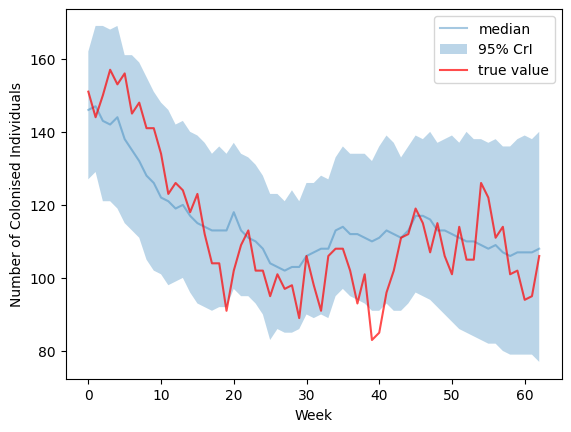

In [30]:
# 95% credible interval and median vs true (burn-in removed)
plt.plot(quantile_array[:,1], alpha=0.4, label="median")
plt.fill_between(range(T+1), quantile_array[:,0], quantile_array[:,2], alpha=0.3, label="95% CrI")
plt.plot(np.sum(UC_results['X'],axis=1), color="red", alpha=0.7, label="true value")
plt.legend()
#plt.title("Number of Colonised Individuals")
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
plt.show()

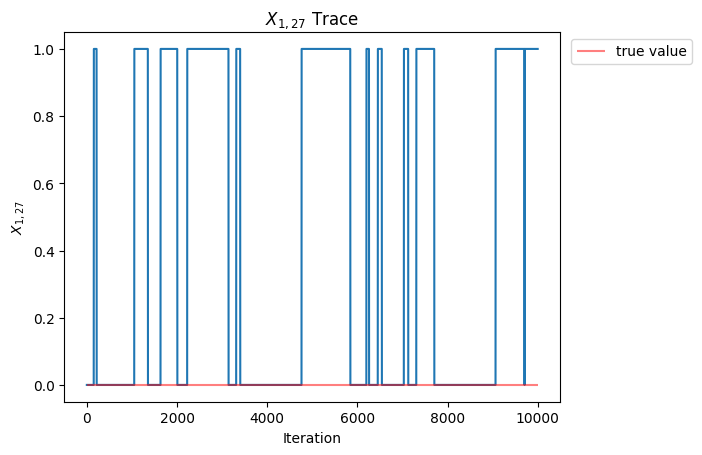

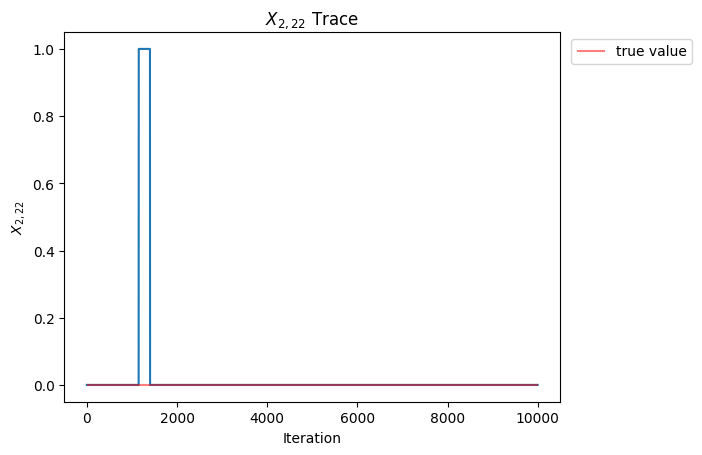

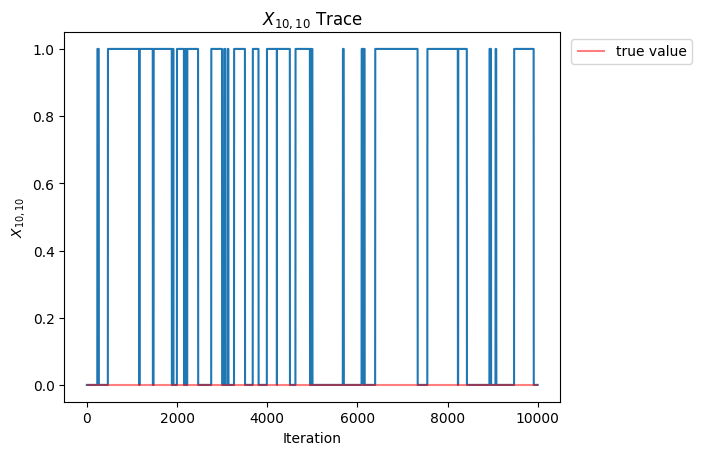

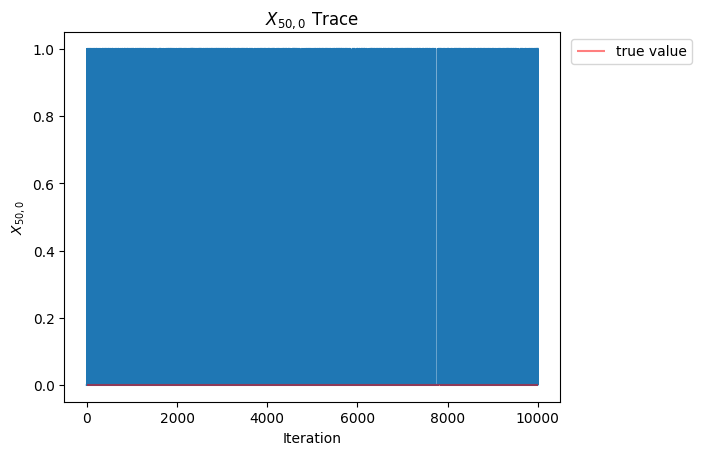

In [27]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# Trace plots of elements of X
plt.plot(MCMC_noncentred_X[:,1,27])
plt.hlines(UC_results['X'][1,27],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{1,27}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{1,27}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,2,22])
plt.hlines(UC_results['X'][2,22],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{2,22}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{2,22}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,10,10])
plt.hlines(UC_results['X'][10,10],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{10,10}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{10,10}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,50,0])
plt.hlines(UC_results['X'][50,0],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{50,0}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{50,0}$')
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

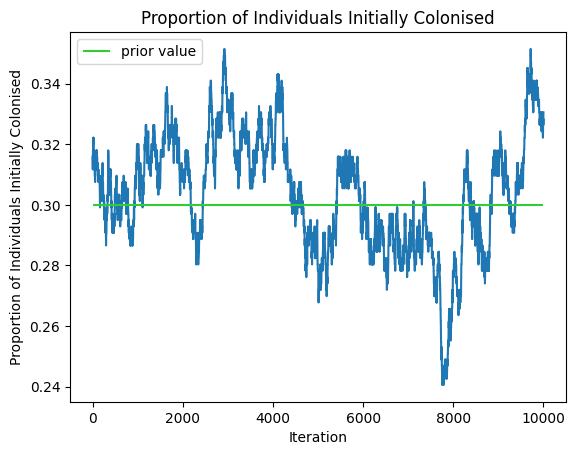

In [31]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# proportion of individuals colonised at time 0
plt.plot(np.average(MCMC_noncentred_X[:,0,:],axis=1))
#plt.hlines(np.average(UC_results['X'][0]),0,K,colors="red",label="true value")
plt.hlines(prior_X_0,0,K,colors="limegreen",label="prior value")
plt.legend()
plt.title("Proportion of Individuals Initially Colonised")
plt.xlabel("Iteration")
plt.ylabel("Proportion of Individuals Initially Colonised")
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

In [60]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = np.zeros(T+1)
#MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for t in range(T+1):
    print(t, end='\r')
    MSJD[t] += np.sum(np.absolute(MCMC_noncentred_X[:(K-1),t]-MCMC_noncentred_X[1:,t]))
    MSJD[t] += np.sum(np.absolute(X_start[t]-MCMC_noncentred_X[0,t]))
#MSJD = MSJD/K
MSJD = MSJD/K
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

[ 0.3631  1.6314  2.7307  3.6364  4.3589  4.9725  5.4405  5.7932  6.003
  6.1711  6.307   6.2918  6.1413  5.9951  5.7955  5.6418  5.5022  5.2792
  5.1192  4.9463  4.7322  4.5121  4.3187  4.1269  3.8926  3.6751  3.4321
  3.1819  2.9394  2.7451  2.6856  2.7785  3.0189  3.3573  3.6235  3.9889
  4.5077  5.2056  5.7627  6.2002  6.5655  6.9449  7.4384  8.0296  8.7762
  9.6841 10.6779 11.771  12.9341 14.1349 15.3501 16.6494 18.069  19.4815
 20.8248 22.0954 23.477  25.0547 26.89   28.8859 30.8627 32.8088 34.6111]


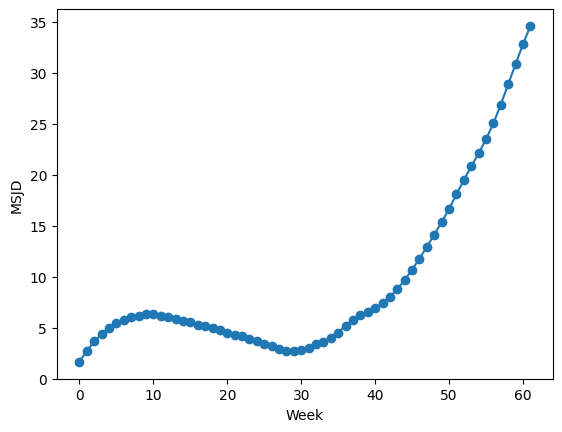

In [65]:
# plotting the MSJD over time
plt.plot(MSJD[1:])
plt.scatter(range(T),MSJD[1:])
plt.xlabel("Week")
plt.ylabel("MSJD")
#plt.yscale("log")
#plt.savefig("plots/MSJD_time.pdf")
plt.show()

## visualising moves

### rippler

In [1]:
# loading in functions for true values
%run '../../function_scripts/rippler/log_dis_U.py'
%run '../../function_scripts/rippler/X_from_U.py'
%run '../../function_scripts/rippler/U_bounds_from_X.py'
%run '../../function_scripts/rippler/prop_new_U_bounds.py'

In [ ]:
# rippler updates
def inference_rippler_moves (test_results:np.array,N:int,h:np.array,gamma:float,T:int,seasonal_matrix_G:np.array,seasonal_matrix_H:np.array,age:np.array,sex:np.array,sens:float,spec:float,theta_start:np.array,X_start:np.array,K:int,K_latent:int,seed:int) :

    # list of inputs:
    # test_results - matrix of all individuals colonisation status over time
    # N - number of individuals in the population
    # h - household mixing matrix (n x n)
    # gamma - recovery rate
    # T - length of time to run the simulation for
    # seasonal_matrix_G - matrix of the seasonality term for all individuals over time, as applied to the global term
    # seasonal_matrix_H - matrix of the seasonality term for all individuals over time, as applied to the household term
    # age - vector of the age of each individual
    # sex - vector of the sex of each individual
    # sens - test sensitivity
    # spec - test specificity
    # theta_start - starting values of the parameters
    # X_start - starting matrix of the latent variables
    # covariance_start - starting covariance matrix for theta
    # scaling - how much to scale the theta covariance matrix by
    # mu - vector of hyperparameters for the priors of beta_G, beta_H, delta_A, delta_S
    # prior_X_0 - prior proportion of individuals initially colonised
    # K - number of macroreplications
    # K_latent - number of latent variable changes within each macroreplication
    # K_chunk - number of chunks
    # zarr_names_start - names of the zarr files that the results will be stored in
    # seed - value of the random seed

    # setting the seed
    random.seed(seed)

    # making the current parameter values equal to the initial values
    theta = theta_start
    X = X_start

    # empty storage
    X_store = np.zeros(shape=(K,T+1,N))
    #accept = np.zeros(K)

    # the log likelihood for this X matrix
    like = log_dis_U_jit(X,test_results,sens,spec)
    U_bounds = U_bounds_from_X_jit(X,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,T,N,h)

    # update the latent variables K times
    for k in range(K):

        # update the latent variables K_latent times
        for k_latent in range(K_latent):

            # generating a u matrix for our current C matrix 
            U_bounds = U_bounds_from_X_jit(X,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,T,N,h)
            U = random.uniform(U_bounds['lower'],U_bounds['upper'])

            # randomly choosing which U to move
            U_prop = U.copy()
            U_prop_widths_matrix = 1-U_bounds['upper']+U_bounds['lower']
            #total_prop_width = np.sum(U_prop_widths_matrix)
            #u_prop_all = random.uniform(0,total_prop_width)
            U_prop_widths_vector = np.reshape(U_prop_widths_matrix,N*T)
            U_prop_widths_vector_cumsum = np.cumsum(U_prop_widths_vector)
            total_prop_width = U_prop_widths_vector_cumsum[-1]
            u_prop_all = random.uniform(0,total_prop_width)
            index = np.sum(U_prop_widths_vector_cumsum < u_prop_all)
            j_change = index % N
            t_change = int((index-j_change)/N)

            # propsing a new u
            U_prop_bounds = prop_new_U_bounds_jit(X,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,T,N,h,t_change,j_change)
            U_prop[t_change,j_change] = random.uniform(U_prop_bounds['lower'],U_prop_bounds['upper'])

            # calculating the log likelihood based on the proposed u
            X_prop = X_from_U_jit(U_prop,np.array([X[0]]),seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,N,T,h)
            like_prop = log_dis_U_jit(X_prop,test_results,sens,spec)

            # finding log_q_move
            U_reverse_bounds = U_bounds_from_X_jit(X_prop,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,T,N,h)
            U_reverse_widths_matrix = 1-U_reverse_bounds['upper']+U_reverse_bounds['lower']
            total_reverse_width = np.sum(U_reverse_widths_matrix)
            log_q_move = np.log(total_prop_width) - np.log(total_reverse_width)

            # M-H step to potentially update the latent variables
            log_alpha = like_prop - like + log_q_move
            log_v = np.log(random.uniform())
            if log_v < log_alpha :
                X = X_prop
                #accept[k] = 1
        
        # storing
        X_store[k] = X

        # resetting
        X = X_start

        # printing the current iteration number
        print("Completed iterations:", k+1, end='\r')
    
    # returning outputs
    #output = {'acc_theta': acc_theta/K, 'acc_initial': acc_initial/K, 'acc_latent': acc_latent/(K*K_latent), 'acc_latent_times':acc_latent_times/acc_latent_times_total}
    #return output

    # list of outputs:
    # acc_theta - acceptance rate of the theta update (RWM)
    # acc_initial - acceptance rate of the initial conditions update
    # acc_latent - acceptance rate of the latent variable update
    # acc_latent_times - acceptance rate of the latent variable update at each point in time

    # returning time taken
    #return(X_store, accept)
    return X_store

In [ ]:
# runnning the moves (1)
K = 2000
K_latent = 1
moves_1 = inference_rippler_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,1)

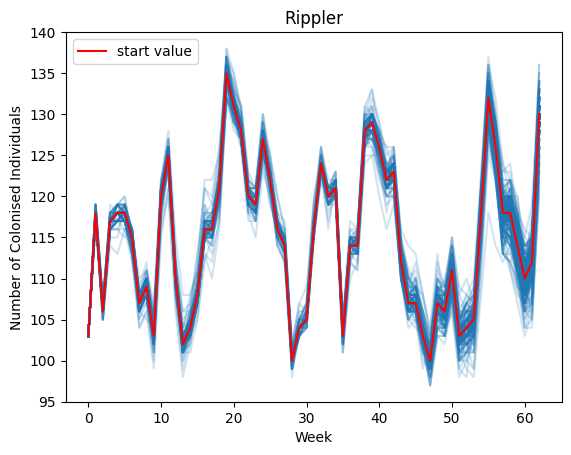

In [ ]:
# plotting
K = 2000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    plt.plot(np.sum(moves_1[k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend()
#plt.ylim(85,150)
plt.ylim(95,140)
plt.title(r'Rippler')
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
plt.show()

In [ ]:
# runnning the moves (100)
K = 1000
K_latent = 100
moves = inference_rippler_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,1)

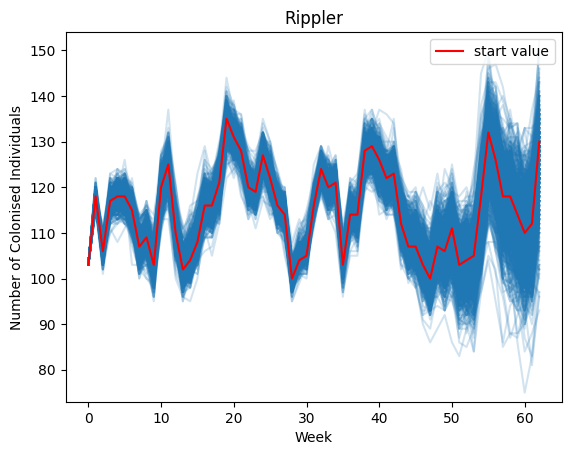

In [ ]:
# plotting
K = 1000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    plt.plot(np.sum(moves[k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend(loc="upper right")
plt.ylim(73,154)
plt.title(r'Rippler')
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
#plt.savefig("plots/updates_accepted_rippler.pdf")
plt.show()

### move/add/delete

In [ ]:
# loading in functions for true values
%run '../../function_scripts/block/log_dis_X.py'
%run '../../function_scripts/block/move.py'
%run '../../function_scripts/block/add.py'
%run '../../function_scripts/block/remove.py'

<Figure size 640x480 with 0 Axes>

In [ ]:
# move/add/delete updates
def inference_block_moves (test_results:np.array,N:int,h:np.array,gamma:float,T:int,seasonal_matrix_G:np.array,seasonal_matrix_H:np.array,age:np.array,sex:np.array,sens:float,spec:float,theta_start:np.array,X_start:np.array,K:int,K_latent:int,m:int,seed:int) :

    # list of inputs:
    # test_results - matrix of all individuals colonisation status over time
    # N - number of individuals in the population
    # h - household mixing matrix (n x n)
    # gamma - recovery rate
    # T - length of time to run the simulation for
    # seasonal_matrix_G - matrix of the seasonality term for all individuals over time, as applied to the global term
    # seasonal_matrix_H - matrix of the seasonality term for all individuals over time, as applied to the household term
    # age - vector of the age of each individual
    # sex - vector of the sex of each individual
    # sens - test sensitivity
    # spec - test specificity
    # theta_start - starting values of the parameters
    # X_start - starting matrix of the latent variables
    # covariance_start - starting covariance matrix for theta
    # scaling - how much to scale the theta covariance matrix by
    # mu - vector of hyperparameters for the priors of beta_G, beta_H, delta_A, delta_S
    # prior_X_0 - prior proportion of individuals initially colonised
    # K - number of macroreplications
    # K_latent - number of latent variable changes within each macroreplication
    # K_chunk - number of chunks
    # zarr_names_start - names of the zarr files that the results will be stored in
    # seed - value of the random seed

    # setting the seed
    random.seed(seed)

    # making the current parameter values equal to the initial values
    theta = theta_start
    X = X_start

    # empty storage
    X_store = np.zeros(shape=(K,T+1,N))
    accept = np.zeros(K)

    # the log likelihood for this X matrix
    like = log_dis_X_jit(X,test_results,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,sens,spec,T,N,h)

    # update the latent variables K times
    for k in range(K):

        # update the latent variables K_latent times
        for k_latent in range(K_latent):

            # proposing new latent variables: either move, add, or remove
            choice = random.choice(np.array([1,2,3]))
            # choice = random.choice(np.array([2,3]))
            # choice = 1
            if choice == 1:
                latent_new = move_event(X,m,N,T)
            elif choice == 2:
                latent_new = add_event(X,m,N,T)
            else:
                latent_new = remove_event(X,m,N,T)

            # extracting the new colonisation matrix and q_move
            X_prop = latent_new['C_prop']
            log_q_move = latent_new['log_q_move']
            
            # calculating the log likelihood based on the proposed X
            like_prop = log_dis_X_jit(X_prop,test_results,seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,gamma,sens,spec,T,N,h)

            # M-H step to potentially update the latent variables
            log_alpha = like_prop - like + log_q_move
            log_v = np.log(random.uniform())
            if log_v < log_alpha :
                X = X_prop
                accept[k] = 1
        
        # storing
        X_store[k] = X

        # resetting
        X = X_start

        # printing the current iteration number
        print("Completed iterations:", k+1, end='\r')
    
    # returning outputs
    #output = {'acc_theta': acc_theta/K, 'acc_initial': acc_initial/K, 'acc_latent': acc_latent/(K*K_latent), 'acc_latent_times':acc_latent_times/acc_latent_times_total}
    #return output

    # list of outputs:
    # acc_theta - acceptance rate of the theta update (RWM)
    # acc_initial - acceptance rate of the initial conditions update
    # acc_latent - acceptance rate of the latent variable update
    # acc_latent_times - acceptance rate of the latent variable update at each point in time

    # returning time taken
    return(X_store, accept)

In [ ]:
# runnning the moves (1)
K = 2000
K_latent = 1
m = 4
moves_block_1 = inference_block_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,m,1)

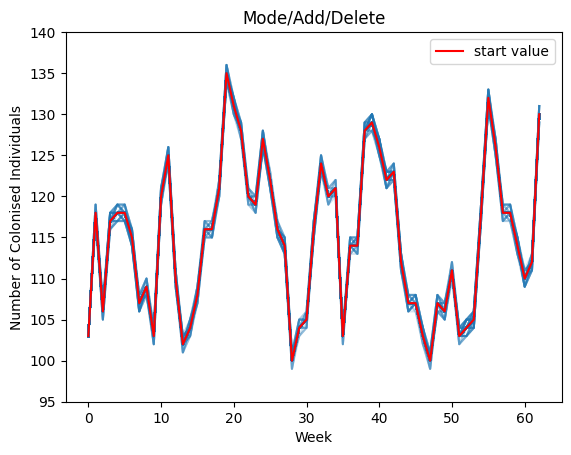

In [ ]:
# plotting
K = 2000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    if moves_block_1[1][k]==1:
        plt.plot(np.sum(moves_block_1[0][k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend()
#plt.ylim(85,150)
plt.ylim(95,140)
plt.title(r'Mode/Add/Delete')
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
plt.show()

In [ ]:
# runnning the moves (100)
K = 1000
K_latent = 100
m = 4
moves_block = inference_block_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,m,1)

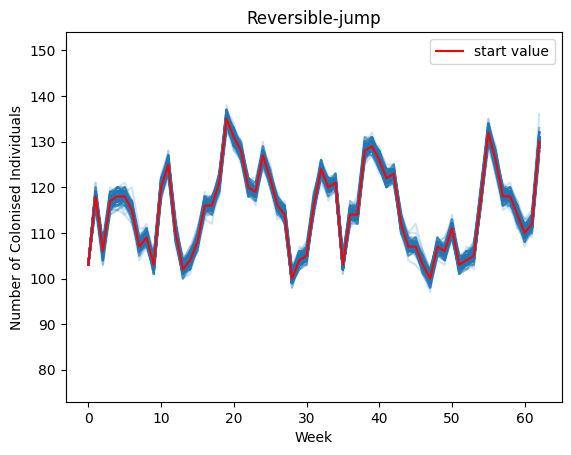

In [ ]:
# plotting
K = 1000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    if moves_block[1][k]==1:
        plt.plot(np.sum(moves_block[0][k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend(loc='upper right')
plt.ylim(73,154)
plt.title(r'Reversible-jump')
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
#plt.savefig("plots/updates_accepted_block.pdf")
plt.show()

### iFFBS

In [ ]:
# loading in functions for true values
%run '../../function_scripts/iFFBS/iFFBS.py'

<Figure size 640x480 with 0 Axes>

In [ ]:
# iFFBS updates
def inference_iFFBS_moves (test_results:np.array,N:int,h:np.array,gamma:float,T:int,seasonal_matrix_G:np.array,seasonal_matrix_H:np.array,age:np.array,sex:np.array,sens:float,spec:float,theta_start:np.array,X_start:np.array,K:int,K_latent:int,seed:int) :

    # list of inputs:
    # test_results - matrix of all individuals colonisation status over time
    # N - number of individuals in the population
    # h - household mixing matrix (n x n)
    # gamma - recovery rate
    # T - length of time to run the simulation for
    # seasonal_matrix_G - matrix of the seasonality term for all individuals over time, as applied to the global term
    # seasonal_matrix_H - matrix of the seasonality term for all individuals over time, as applied to the household term
    # age - vector of the age of each individual
    # sex - vector of the sex of each individual
    # sens - test sensitivity
    # spec - test specificity
    # theta_start - starting values of the parameters
    # X_start - starting matrix of the latent variables
    # covariance_start - starting covariance matrix for theta
    # scaling - how much to scale the theta covariance matrix by
    # mu - vector of hyperparameters for the priors of beta_G, beta_H, delta_A, delta_S
    # prior_X_0 - prior proportion of individuals initially colonised
    # K - number of macroreplications
    # K_latent - number of latent variable changes within each macroreplication
    # K_chunk - number of chunks
    # zarr_names_start - names of the zarr files that the results will be stored in
    # seed - value of the random seed

    # setting the seed
    random.seed(seed)

    # making the current parameter values equal to the initial values
    theta = theta_start
    X = X_start

    # empty storage
    X_store = np.zeros(shape=(K,T+1,N))
    accept = np.ones(K)
    
    # update the latent variables K times
    for k in range(K):

        # update the latent variables K_latent times
        for k_latent in range(K_latent):
            j = random.randint(0,N)
            u = random.uniform(size=(T+1))
            X = iFFBS_jit(X, test_results, j, seasonal_matrix_G, seasonal_matrix_H, age, sex, theta, gamma, T, N, h, prior_X_0, sens, spec, u)
        
        # storing
        X_store[k] = X

        # resetting
        X = X_start

        # printing the current iteration number
        print("Completed iterations:", k+1, end='\r')
    
    # returning outputs
    #output = {'acc_theta': acc_theta/K, 'acc_initial': acc_initial/K, 'acc_latent': acc_latent/(K*K_latent), 'acc_latent_times':acc_latent_times/acc_latent_times_total}
    #return output

    # list of outputs:
    # acc_theta - acceptance rate of the theta update (RWM)
    # acc_initial - acceptance rate of the initial conditions update
    # acc_latent - acceptance rate of the latent variable update
    # acc_latent_times - acceptance rate of the latent variable update at each point in time

    # returning time taken
    return(X_store, accept)

In [ ]:
# runnning the moves (1)
K = 1000
K_latent = 1
moves_iFFBS_1 = inference_iFFBS_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,1)

/home/neillj/.pyenv/versions/3.9.10/lib/python3.9/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


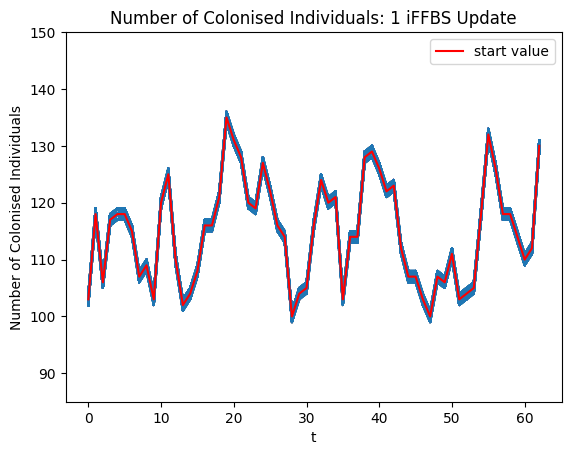

In [ ]:
# plotting
K = 1000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    plt.plot(np.sum(moves_iFFBS_1[0][k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend()
plt.ylim(85,150)
plt.title(r'Number of Colonised Individuals: 1 iFFBS Update')
plt.xlabel("t")
plt.ylabel("Number of Colonised Individuals")
plt.show()

In [ ]:
# runnning the moves (100)
K = 1000
K_latent = 100
moves_iFFBS = inference_iFFBS_moves(test_results,N,h,gamma,T,seasonal_matrix_G,seasonal_matrix_H,age,sex,sens,spec,theta_start,X_start,K,K_latent,1)

/home/neillj/.pyenv/versions/3.9.10/lib/python3.9/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


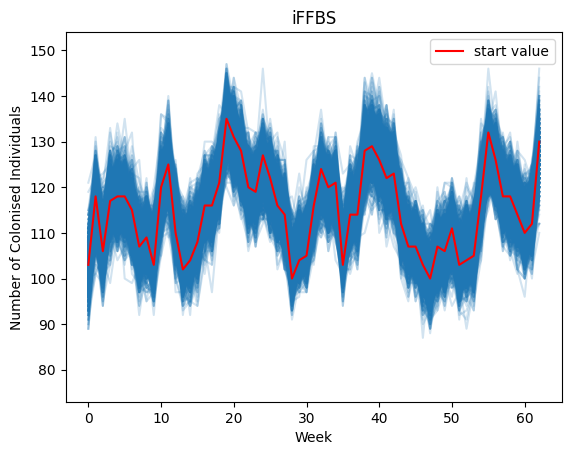

In [ ]:
# plotting
K = 1000
colours = plt.cm.Blues(np.linspace(1,0,K))
for k in range(K):
    plt.plot(np.sum(moves_iFFBS[0][k],axis=1),color="C0",alpha=0.2)
plt.plot(np.sum(UC_results['X'],axis=1),color="red",label="start value")
plt.legend()
plt.ylim(73,154)
plt.title(r'iFFBS')
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
#plt.savefig("plots/updates_accepted_iFFBS.pdf")
plt.show()

## end